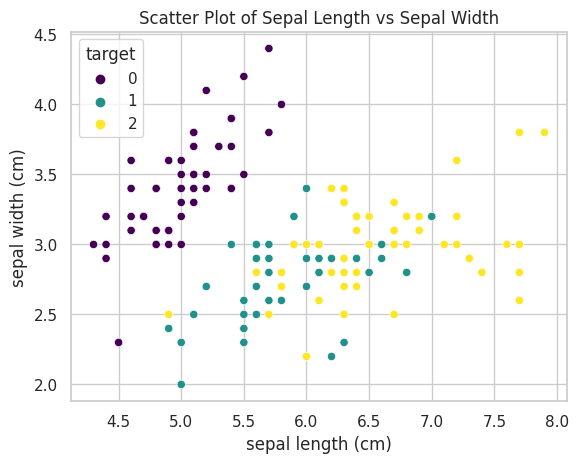

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names

# Create a DataFrame for easier plotting using Seaborn
import pandas as pd
iris_df = pd.DataFrame(data, columns=feature_names)
iris_df['target'] = target

# Set the style of Seaborn
sns.set(style="whitegrid")

# Create a scatter plot
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=iris_df, palette='viridis', legend='full')

# Show the plot
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()


In [18]:
import pandas as pd

# Create a sample DataFrame with null values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', None, 'Eve'],
    'Age': [25, 30, None, 22, 28],
    'Salary': [50000, 60000, 75000, None, 80000]
}

df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Find and display null values in the DataFrame
print("\nNull values in the DataFrame:")
print(df.isnull())

# Remove null values from the DataFrame
df_cleaned = df.dropna()

# Display the DataFrame after removing null values
print("\nDataFrame after removing null values:")
print(df_cleaned)


Original DataFrame:
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob  30.0  60000.0
2  Charlie   NaN  75000.0
3     None  22.0      NaN
4      Eve  28.0  80000.0

Null values in the DataFrame:
    Name    Age  Salary
0  False  False   False
1  False  False   False
2  False   True   False
3   True  False    True
4  False  False   False

DataFrame after removing null values:
    Name   Age   Salary
0  Alice  25.0  50000.0
1    Bob  30.0  60000.0
4    Eve  28.0  80000.0


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a sample DataFrame with categorical values
data = {
    'Category': ['A', 'B', 'A', 'C', 'B', 'C'],
    'Value': [10, 20, 15, 25, 30, 22]
}

df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical values to numeric format
df['Category'] = label_encoder.fit_transform(df['Category'])

# Display the DataFrame after converting categorical values
print("\nDataFrame after converting categorical values to numeric format:")
print(df)


Original DataFrame:
  Category  Value
0        A     10
1        B     20
2        A     15
3        C     25
4        B     30
5        C     22

DataFrame after converting categorical values to numeric format:
   Category  Value
0         0     10
1         1     20
2         0     15
3         2     25
4         1     30
5         2     22


In [21]:
from sklearn import tree

# Define the dataset
# Each tuple represents (Outlook, Temperature, Humidity, Windy, Play Tennis)
# Outlook: 0 - Sunny, 1 - Overcast, 2 - Rainy
# Temperature: 0 - Cool, 1 - Mild, 2 - Hot
# Humidity: 0 - Normal, 1 - High
# Windy: 0 - False, 1 - True
# Play Tennis: 0 - No, 1 - Yes
data = [
    (0, 0, 0, 0, 0),
    (0, 0, 0, 1, 0),
    (1, 0, 0, 0, 1),
    (2, 1, 0, 0, 1),
    (2, 2, 1, 0, 1),
    (2, 2, 1, 1, 0),
    (1, 2, 1, 1, 1),
    (0, 1, 0, 0, 0),
    (0, 2, 1, 0, 1),
    (2, 1, 1, 0, 1),
    (0, 1, 1, 1, 1),
    (1, 1, 0, 1, 1),
    (1, 0, 1, 0, 1),
    (2, 1, 0, 1, 0),
]

# Separate features and labels
X = [row[:-1] for row in data]
y = [row[-1] for row in data]

# Create a decision tree classifier
clf = tree.DecisionTreeClassifier()

# Train the classifier
clf = clf.fit(X, y)

# Predict whether to play tennis for a new set of weather conditions
new_data = [(0, 1, 0, 0)]  # Example: Sunny, Mild, Normal Humidity, Not Windy
prediction = clf.predict(new_data)

# Display the prediction
if prediction[0] == 1:
    print("Play Tennis!")
else:
    print("Do not play Tennis.")

# Visualize the decision tree (optional)
# Note: Graphviz must be installed for this to work. You can install it using `pip install graphviz`.
# Uncomment the following lines if you want to visualize the decision tree.
# import graphviz
# dot_data = tree.export_graphviz(clf, out_file=None, feature_names=["Outlook", "Temperature", "Humidity", "Windy"], class_names=["No", "Yes"], filled=True, rounded=True, special_characters=True)
# graph = graphviz.Source(dot_data)
# graph.render("tennis_decision_tree", format="png", cleanup=True)


Do not play Tennis.


Mean Squared Error: 0.6536995137170021


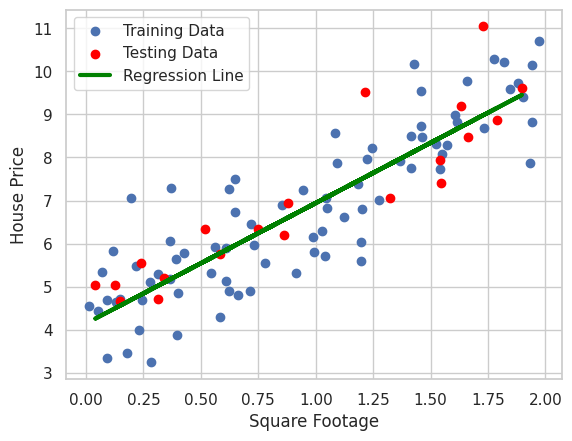

In [22]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate some example data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Independent variable (e.g., square footage)
y = 4 + 3 * X + np.random.randn(100, 1)  # Dependent variable (e.g., house price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the training data, testing data, and the regression line
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_test, y_pred, color='green', linewidth=3, label='Regression Line')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.legend()
plt.show()


In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



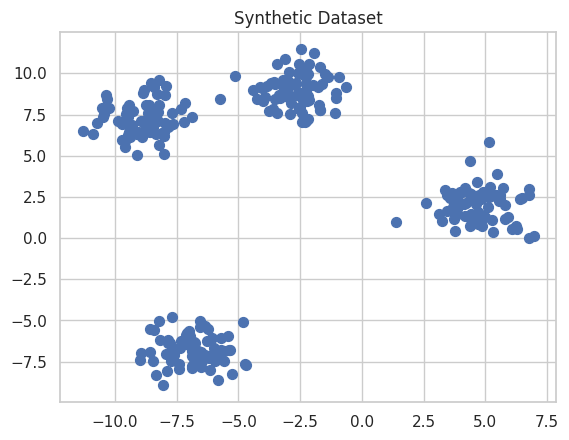

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


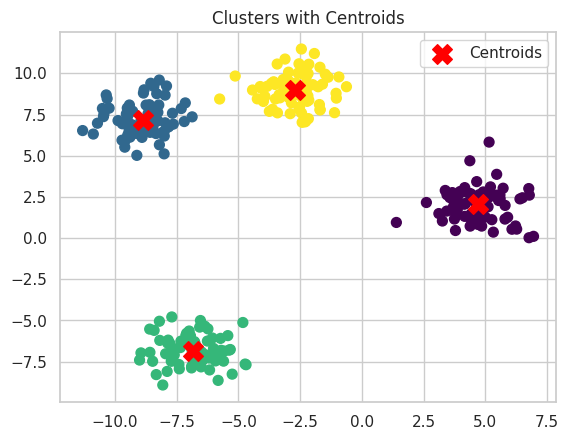

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Visualize the synthetic dataset
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Synthetic Dataset")
plt.show()

# Apply k-means algorithm
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("Clusters with Centroids")
plt.legend()
plt.show()
